## CCT College Dublin

**Assessment Cover Page**
_______________________________________________________________________


|**Module Title:** | Data Preparatio n& Visualisation |
|**Module Title:** | Statistical Techniques for Data Analytics |
|**Module Title:** | Machine Learning |
|:---|---|
|**Assessment Title:** | CA2_HDip
|**Lecturer Name:** | David McQuaid | Data Preparation & Visualisation |
|**Lecturer Name:** | Marina Iantorno | Statistical Techniques for Data Analytics  |   
|**Lecturer Name:** | Dr Muhammad Iqbal | Machine Learning |
|**Students Full Name:** | Miroslava Slavikova  |
|**Students Number:** | SBA22382 |
|**Assessment Due Date:** | 5 January 2024  |
|**Date of Submission:** | 2 January 2024 |


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Employee_Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

Checking for null values

In [6]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

replace null values

it dipslays the distrubution of missing data accross the data set

<AxesSubplot:>

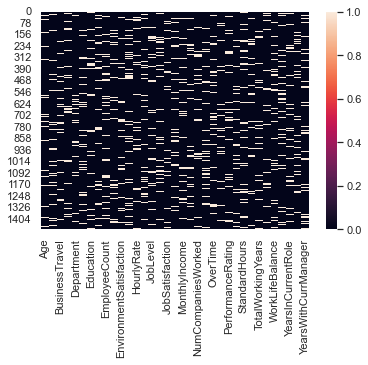

In [7]:
sns.heatmap(df.isnull())

distribution of missing data within the dataset

In [8]:
num = df.select_dtypes(include = np.number).columns

In [9]:
df[num]=df[num].apply(pd.to_numeric,errors='coerce')

In [10]:
df[num]=df[num].fillna(df[num].mean())

In [11]:
df[num]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,990.110009,1.016716,1.770313,1.033298,1.054148,2.146294,93.827486,3.426960,2.464492,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,276.776030,9.091097,1.035333,0.944859,2.107031,3.470803,52.304157,1.813458,1.788697,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1204.158501,2.198662,2.118801,0.810809,4.008125,3.979420,87.271332,1.877226,0.833488,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,1352.752432,2.937851,3.670674,0.822976,4.587269,3.734705,56.378982,2.932646,1.095372,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,485.053333,1.988953,1.120496,0.999325,7.228740,1.079412,40.433887,3.117739,0.937746,...,2.720431,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,914.061807,21.647903,2.923447,0.950166,2142.083554,3.171444,65.647722,3.372679,1.993840,...,3.020184,85.835352,0.962354,11.426152,3.451951,2.819336,5.436125,2.021736,0.000000,4.117695
1466,34.957777,574.675152,6.027683,1.122961,1.064563,2221.578902,4.284094,39.842324,2.038727,2.532482,...,1.014690,94.868401,0.923291,11.426152,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,151.506083,9.091097,3.478895,0.960908,1026.679166,2.152282,91.603642,4.394863,1.964613,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,36.635268,995.977086,2.094496,2.956093,0.873312,2086.654641,4.095580,59.110216,2.019760,1.925025,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,4.117695


Filling missing values with mean value. Mean value replaced NaN. Only for Numerical values

In [12]:
cat= df.select_dtypes(include = 'object').columns

In [13]:
df[cat]=df[cat].fillna(df[cat].mode().iloc[0])

In [14]:
df[cat]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Human Resources,Medical,Male,Sales Executive,Married,Y,No


replacing categorical values with the most accuring values

<AxesSubplot:>

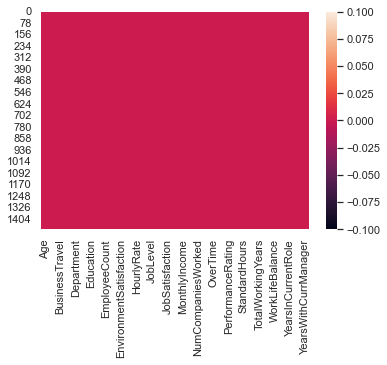

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

replacing missing values with mean values for each column 

In [17]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.374687,392.769463,7.757915,1.017143,0.094539,579.131037,1.071667,20.367184,0.726254,1.069143,...,1.058652,7.610557,0.818755,7.661153,1.260794,0.722682,5.736280,3.470258,3.056050,3.409489
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,30.357410,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.065687,...,1.967961,75.457008,0.000000,6.338285,2.012541,2.288428,2.976554,1.895985,0.000000,1.812728
50%,36.262348,802.030050,7.871631,2.923447,0.999325,1026.679166,2.726443,65.647722,2.779384,1.999218,...,2.749160,80.241313,0.856451,10.025634,2.811756,2.811240,5.951131,3.493610,1.035323,3.407985
75%,41.714666,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.310216,...,3.475659,84.947190,1.057531,14.198518,3.262780,3.169524,8.797517,6.756694,2.160710,6.739316
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Data preparatation first step

In [18]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.002793,-0.003955,0.196264,-0.011310,-0.003227,-0.010647,0.024101,0.020492,0.423806,...,0.022500,0.001870,0.038462,0.568422,-0.018877,-0.031854,0.245315,0.161113,0.164664,0.165176
DailyRate,0.002793,1.000000,-0.003768,-0.011011,0.008580,-0.044783,0.017897,0.028444,0.046287,-0.011954,...,0.017572,-0.036248,0.006384,0.012495,-0.008186,-0.031624,-0.034963,0.006288,-0.020973,-0.035838
DistanceFromHome,-0.003955,-0.003768,1.000000,0.010769,0.005250,0.031684,-0.027628,0.023357,-0.005367,0.020679,...,0.022494,-0.002335,0.036067,0.003805,-0.042229,-0.016178,0.021427,0.018096,-0.004784,0.030401
Education,0.196264,-0.011011,0.010769,1.000000,-0.034053,0.031758,0.006738,0.002878,0.030511,0.094814,...,-0.017281,0.009294,0.007709,0.129922,-0.030998,-0.003973,0.068853,0.066096,0.044889,0.059017
EmployeeCount,-0.011310,0.008580,0.005250,-0.034053,1.000000,0.056851,0.023366,0.051122,-0.035537,0.003601,...,0.014156,-0.003120,-0.034454,0.002473,-0.048657,-0.003623,0.016372,0.014349,-0.003968,-0.029948
EmployeeNumber,-0.003227,-0.044783,0.031684,0.031758,0.056851,1.000000,0.036685,0.003195,-0.015014,-0.003805,...,-0.065990,0.000235,0.057308,-0.017575,-0.006091,0.018971,-0.002319,-0.015795,-0.007606,-0.018870
EnvironmentSatisfaction,-0.010647,0.017897,-0.027628,0.006738,0.023366,0.036685,1.000000,-0.033759,-0.020385,0.006506,...,0.023292,-0.017007,-0.001502,-0.011130,-0.026059,0.033841,-0.018995,-0.001169,-0.000255,-0.046248
HourlyRate,0.024101,0.028444,0.023357,0.002878,0.051122,0.003195,-0.033759,1.000000,0.028212,-0.009064,...,0.002992,-0.015961,0.028637,0.043036,-0.027057,-0.015436,0.034006,-0.005331,0.007727,0.013533
JobInvolvement,0.020492,0.046287,-0.005367,0.030511,-0.035537,-0.015014,-0.020385,0.028212,1.000000,-0.007630,...,0.003054,0.003677,0.007641,0.011078,-0.029601,-0.021146,0.000691,0.028976,0.020423,0.042304
JobLevel,0.423806,-0.011954,0.020679,0.094814,0.003601,-0.003805,0.006506,-0.009064,-0.007630,1.000000,...,0.020708,0.038482,0.015809,0.686853,-0.034702,0.037492,0.440658,0.327398,0.310795,0.319783


dark ones show correlation btw features

<AxesSubplot:>

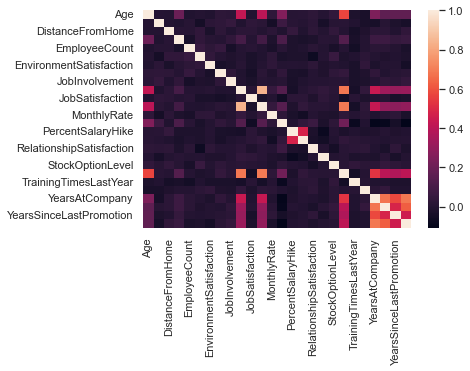

In [19]:
sns.heatmap(df.corr())

<AxesSubplot:>

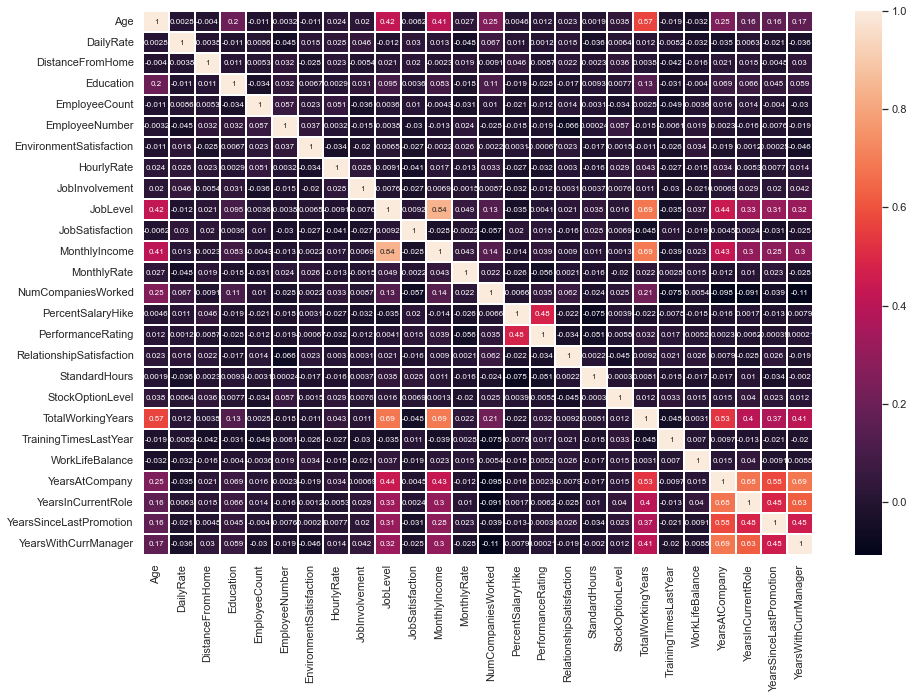

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.1,annot_kws={'size':8})

I see important features now which is in the range of 0.6 to 1 and those we're filtering now

In [22]:
!pip install fasteda

Defaulting to user installation because normal site-packages is not writeable


this is library that helps to perform EDA more effecttively source: https://pypi.org/project/fasteda/

DataFrame Head:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,9.091097,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,15.295717,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000


DataFrame Tail:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,9.091097,3.478895,Life Sciences,0.960908,1026.679166,2.152282,Male,91.603642,4.394863,1.964613,Manufacturing Director,2.152039,Married,6609.842365,14364.334764,1.017623,Y,Yes,18.744411,3.149344,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,36.635268,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,4.095580,Male,59.110216,2.019760,1.925025,Sales Executive,2.715272,Married,5585.302599,11837.891371,1.591695,Y,No,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,4.117695
1469,38.133892,No,Travel_Rarely,703.677110,Research & Development,7.231661,3.292684,Medical,1.061133,1026.679166,1.738502,Male,67.262829,4.478969,2.291543,Laboratory Technician,2.875309,Married,5188.877974,10276.024987,2.364262,Y,No,10.343964,3.053256,1.076817,82.610288,0.000000,6.493763,3.451604,4.376818,3.755110,3.308961,1.070952,2.025939


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1470, 35)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Age,1470,36.635,36.262,9.375,14.545,30.357,36.262,41.715,69.403,0.602062,0.269328
DailyRate,1470,802.03,802.03,392.769,86.828,502.682,802.03,1101.063,1784.394,0.134187,-0.807563
DistanceFromHome,1470,9.091,7.872,7.758,0.75,2.265,7.872,11.525,33.684,1.081448,0.317231
Education,1470,2.923,2.923,1.017,0.77,2.201,2.923,3.598,6.285,-0.159623,-0.261388
EmployeeCount,1470,0.999,0.999,0.095,0.629,0.938,0.999,1.06,1.291,-0.000180,0.221564
EmployeeNumber,1470,1026.679,1026.679,579.131,1.054,539.35,1026.679,1469.777,2530.919,0.106828,-0.846289
EnvironmentSatisfaction,1470,2.726,2.726,1.072,0.76,1.956,2.726,3.502,5.255,-0.150624,-0.848111
HourlyRate,1470,65.648,65.648,20.367,23.855,49.028,65.648,81.466,123.2,0.127429,-0.746664
JobInvolvement,1470,2.743,2.779,0.726,0.722,2.261,2.779,3.139,5.242,-0.190544,0.616817
JobLevel,1470,2.058,1.999,1.069,0.715,1.066,1.999,2.31,5.942,1.157152,1.100321


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



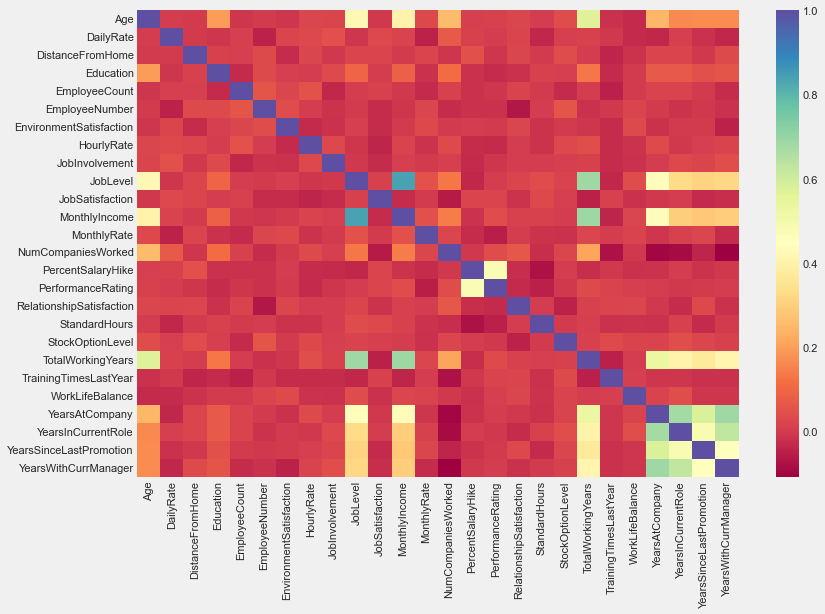

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



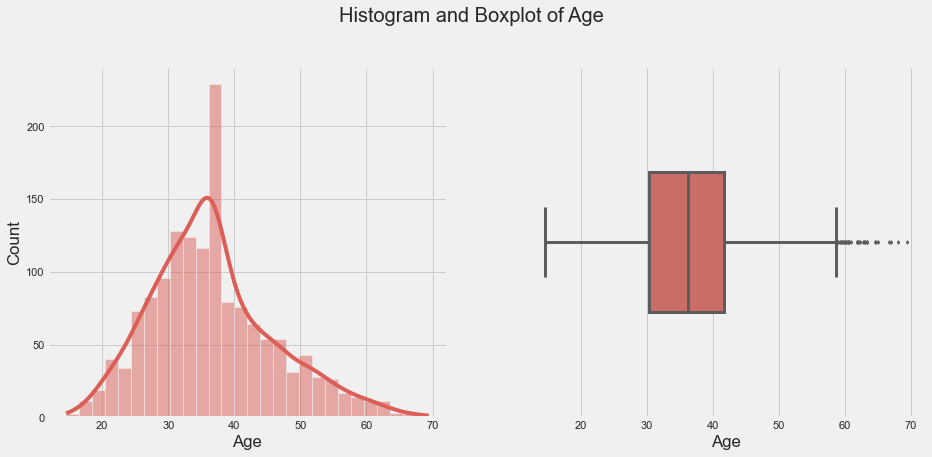

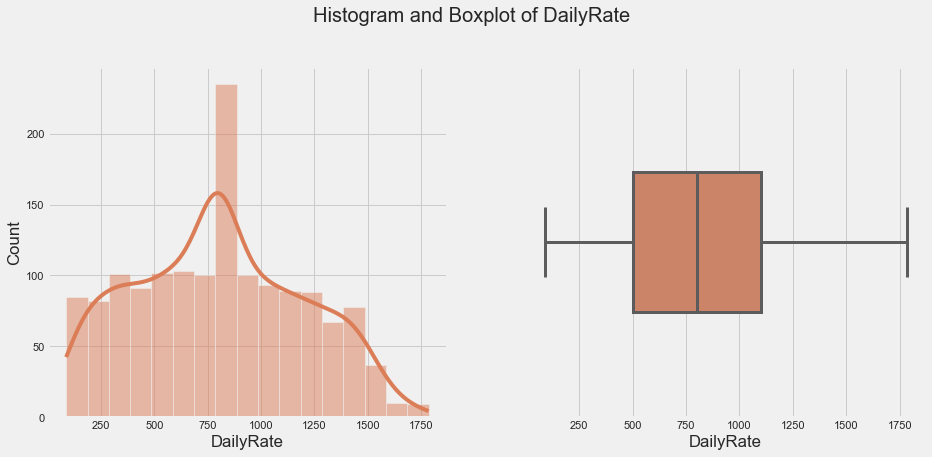

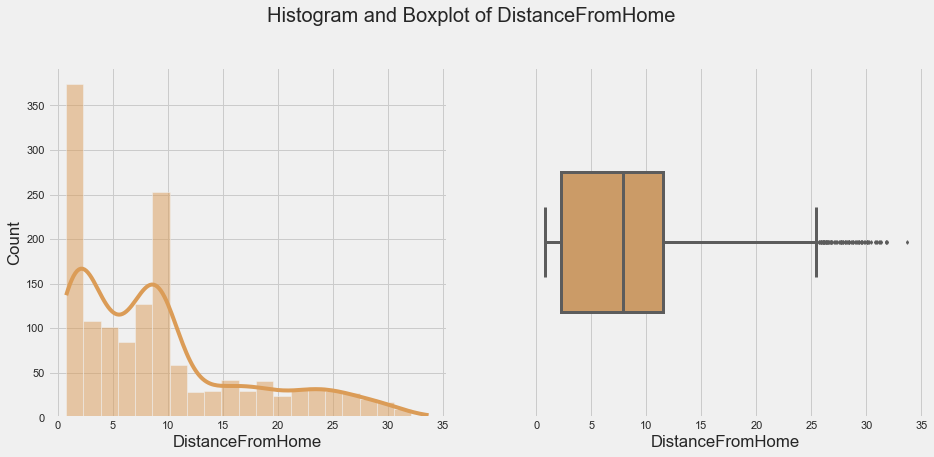

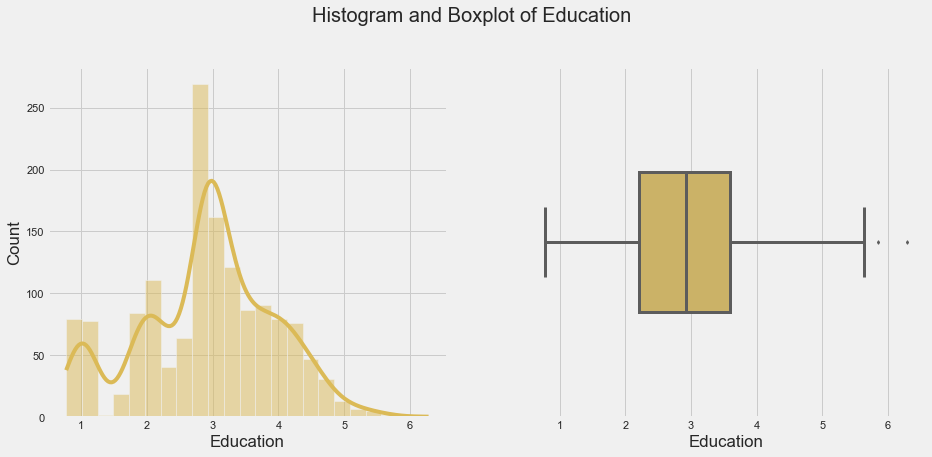

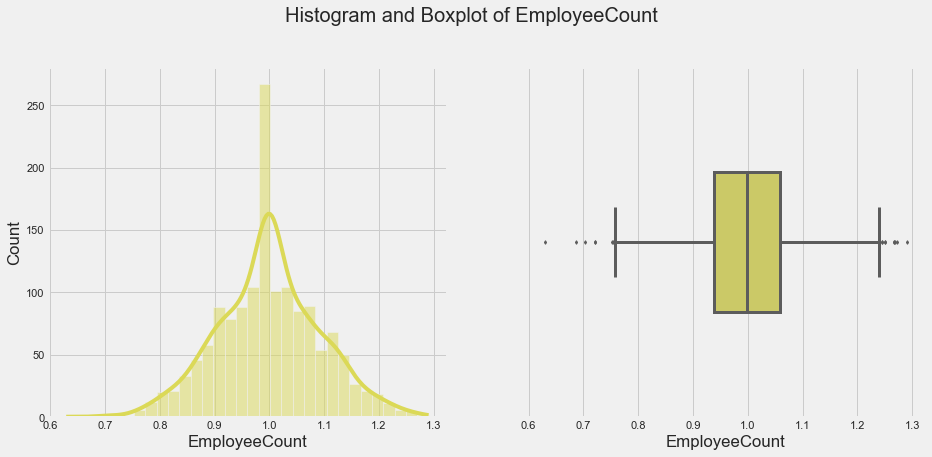

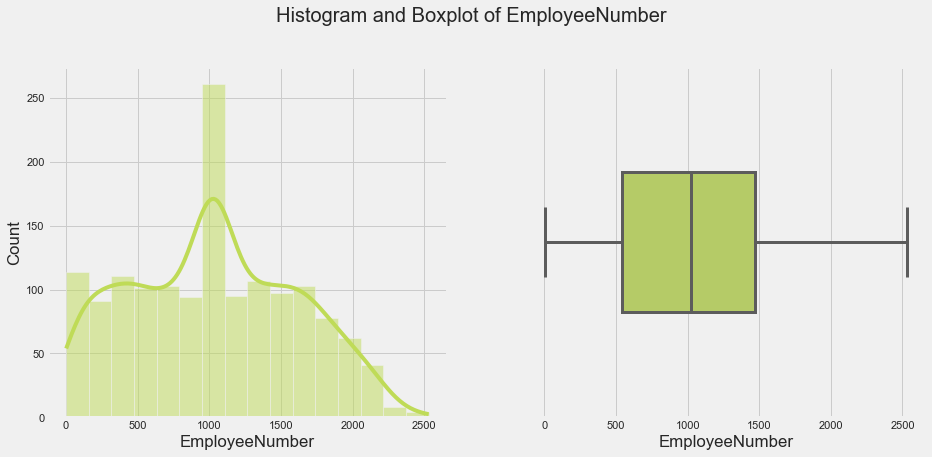

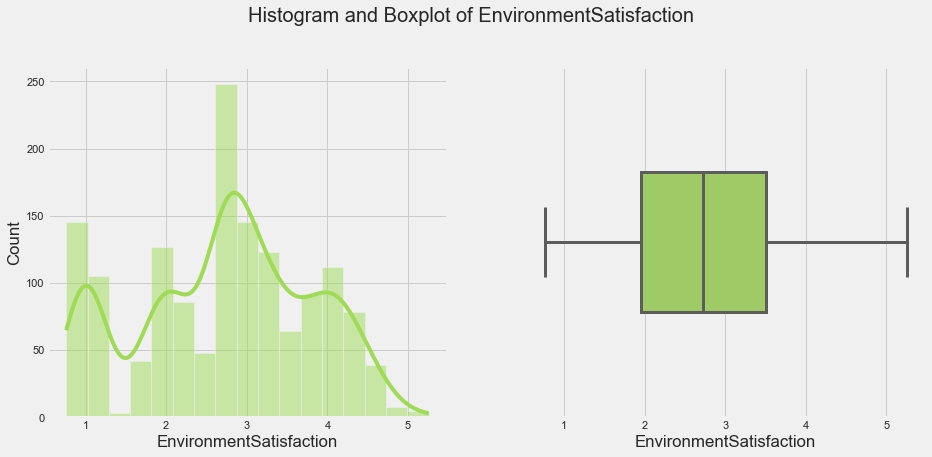

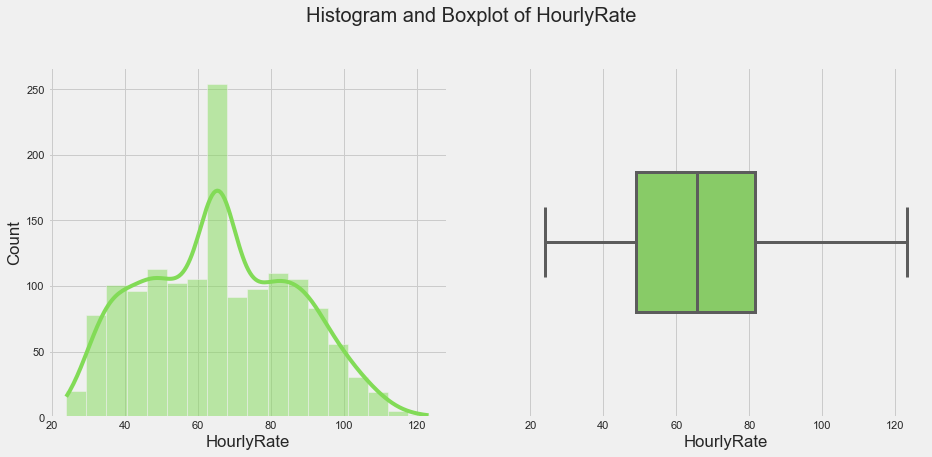

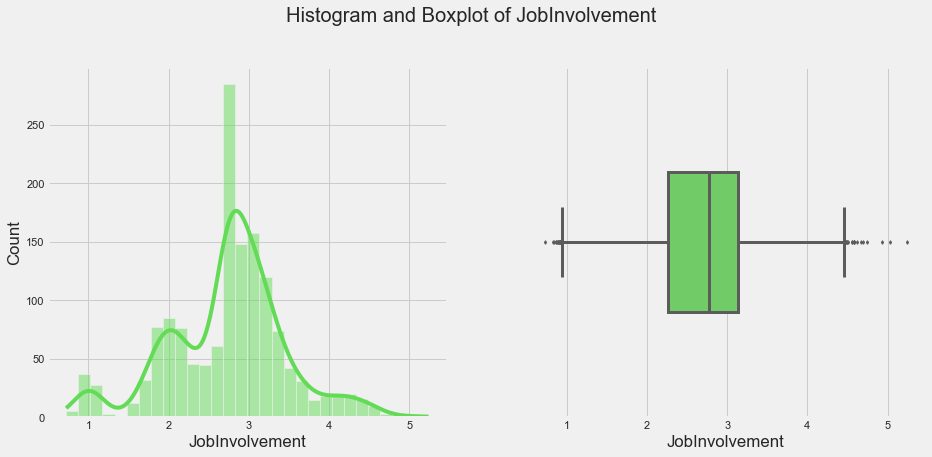

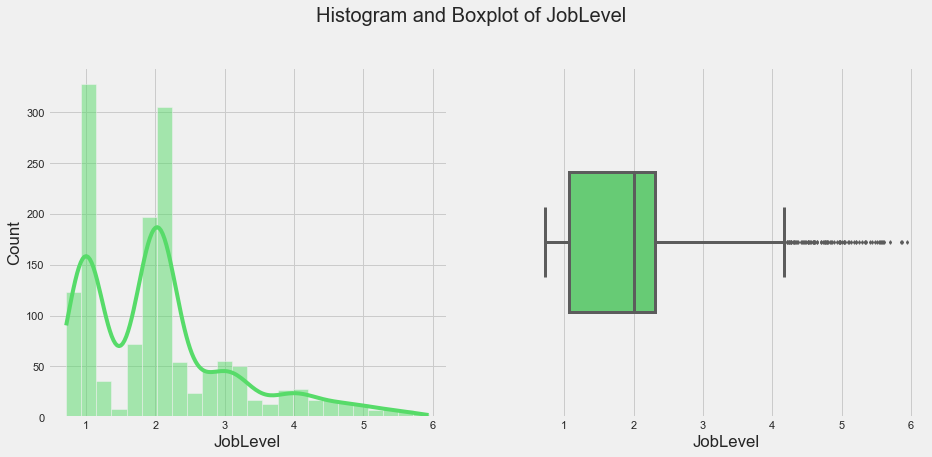

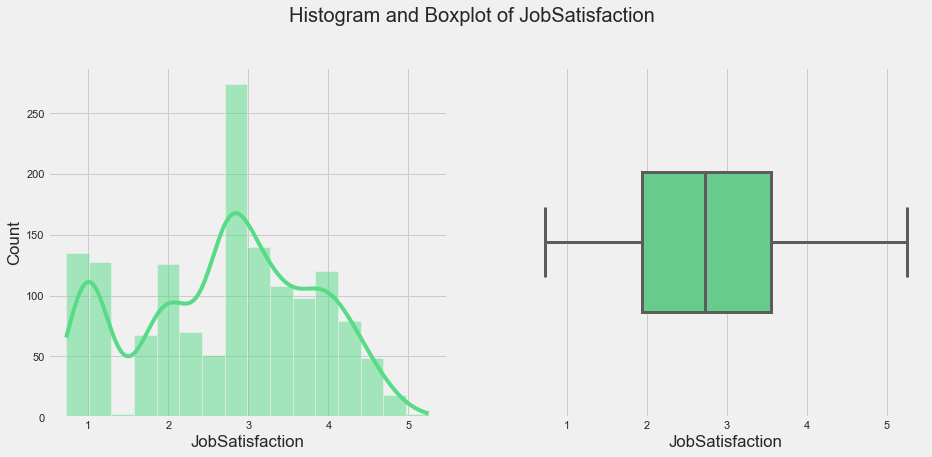

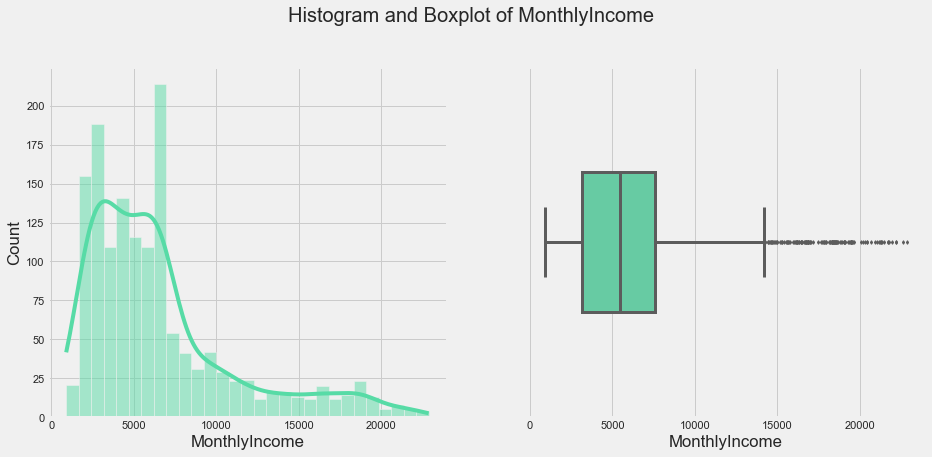

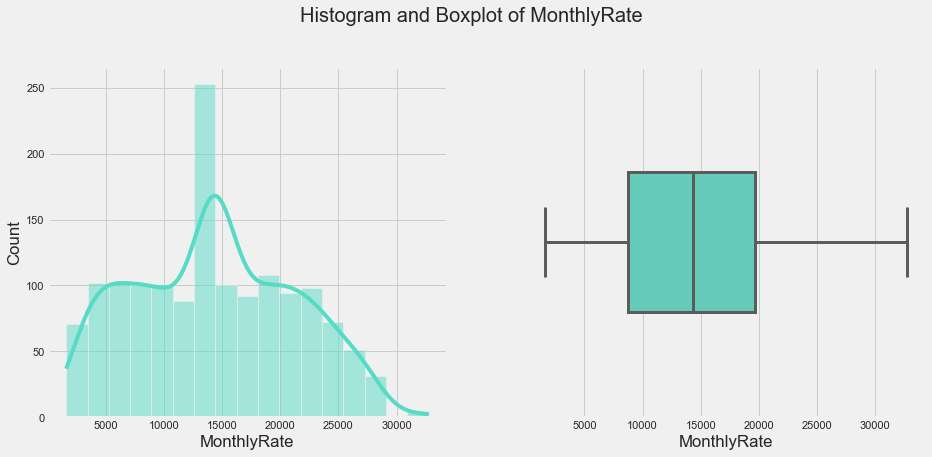

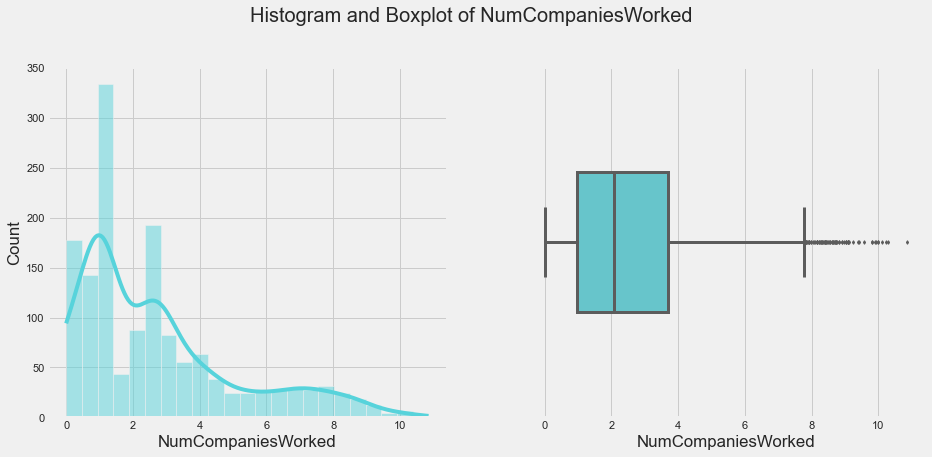

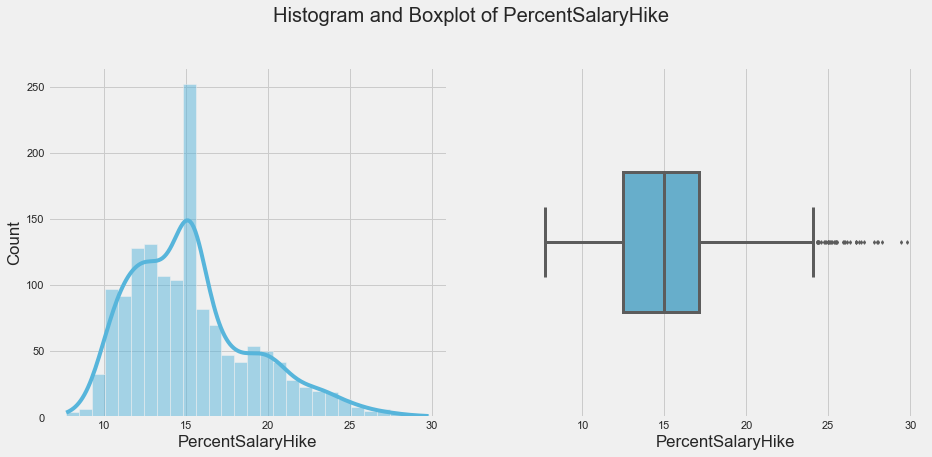

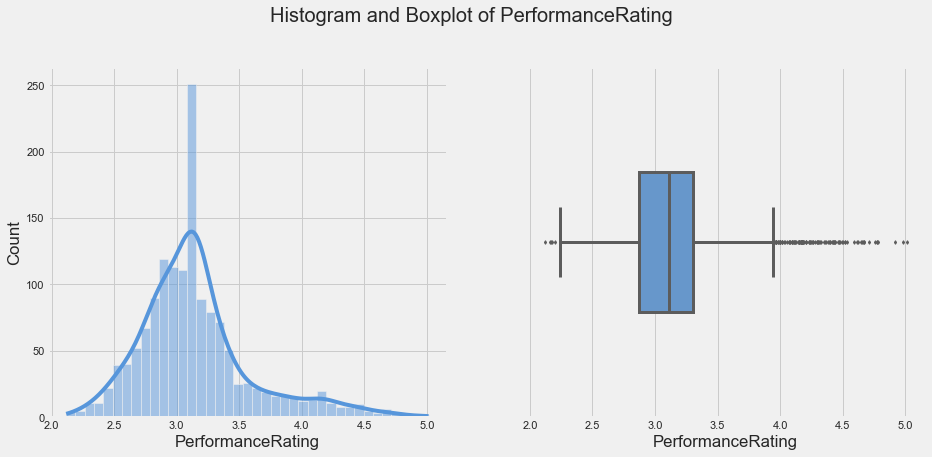

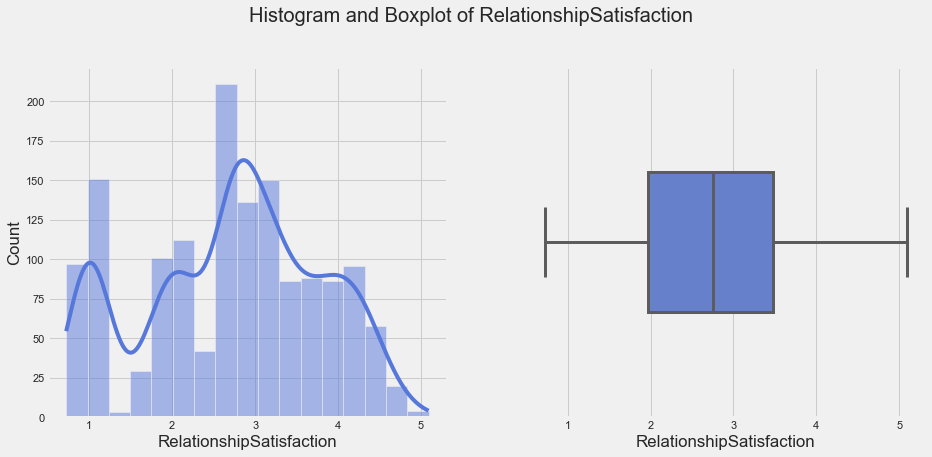

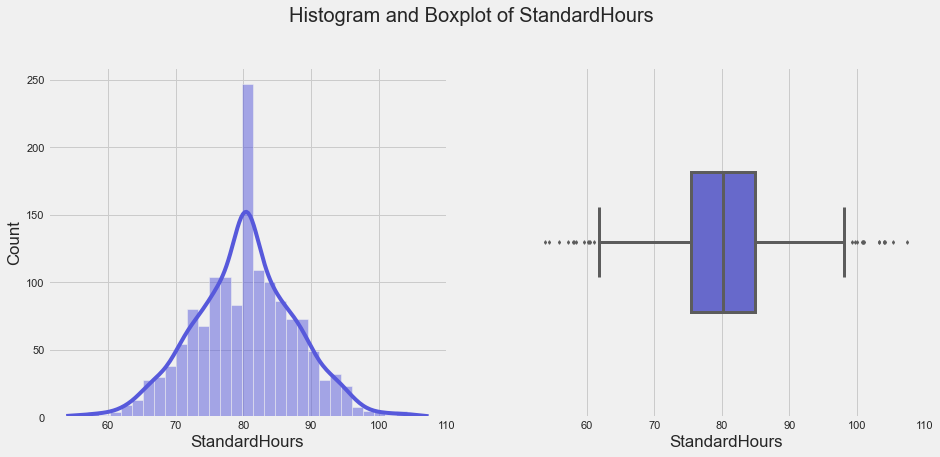

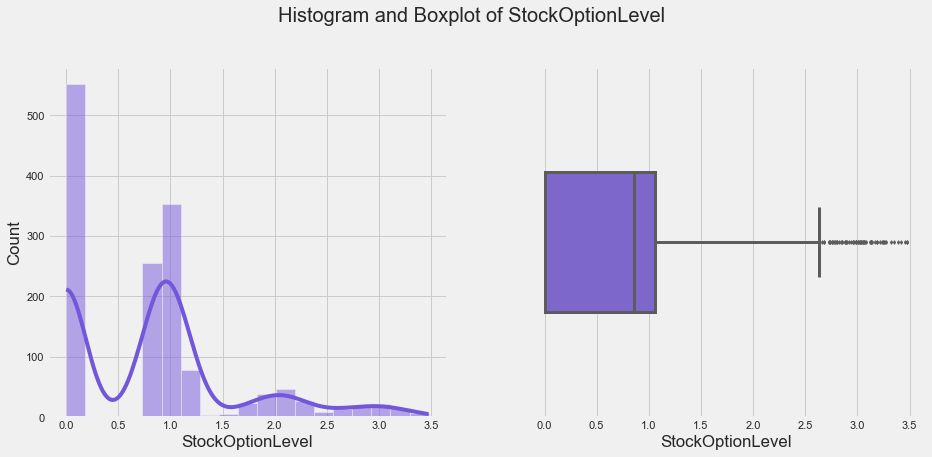

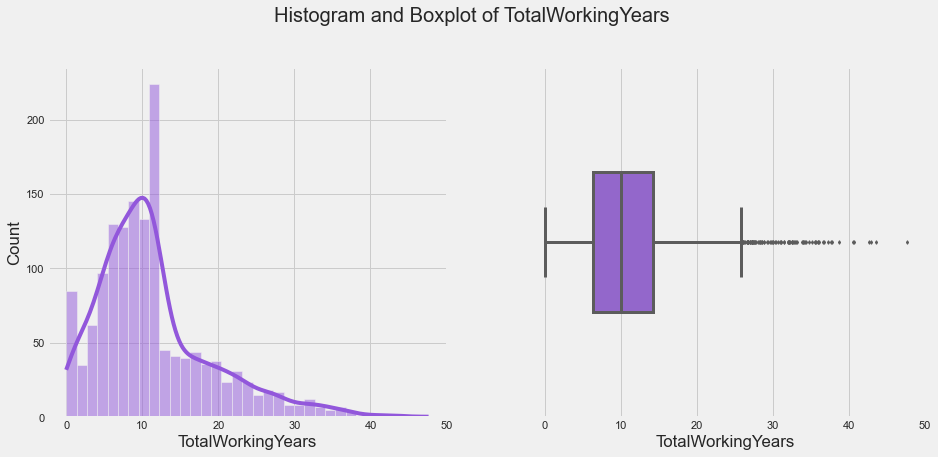

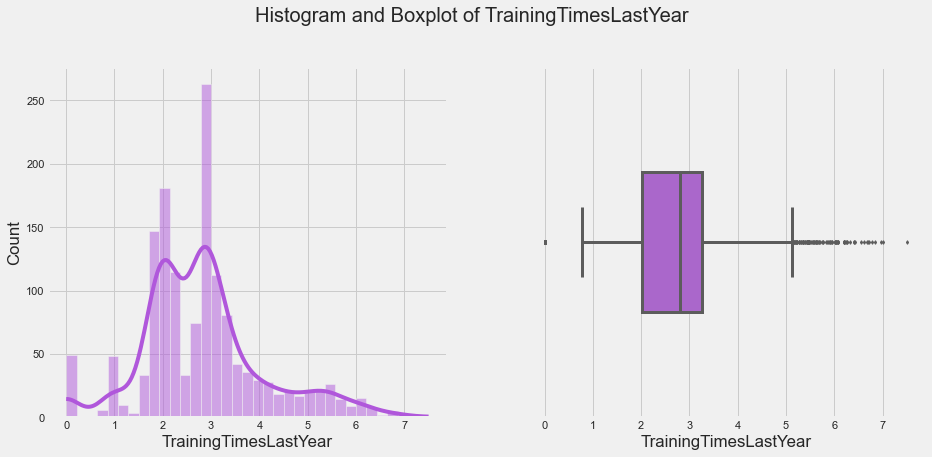

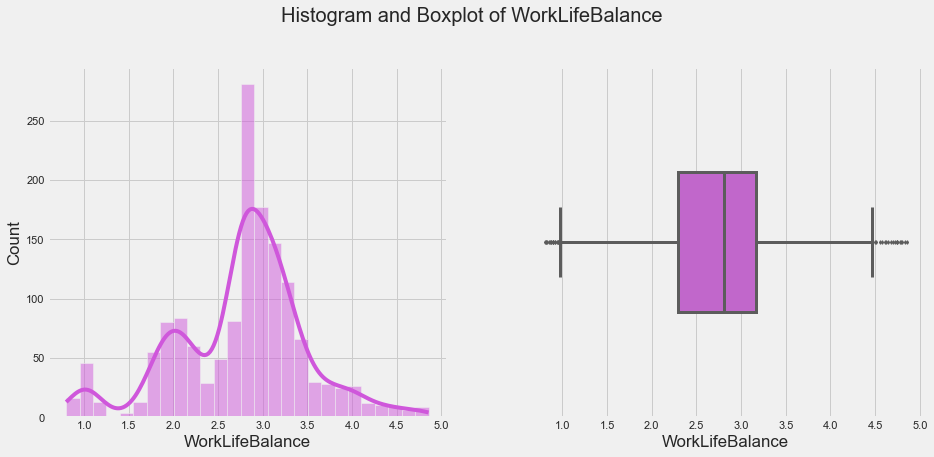

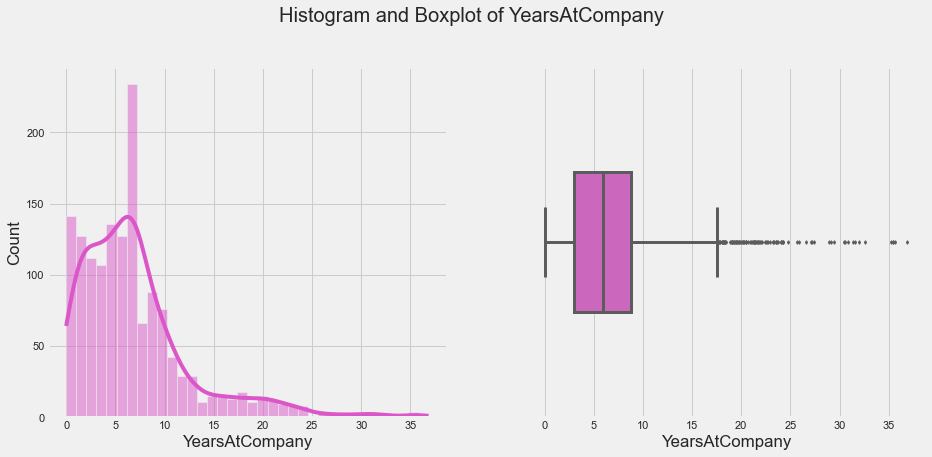

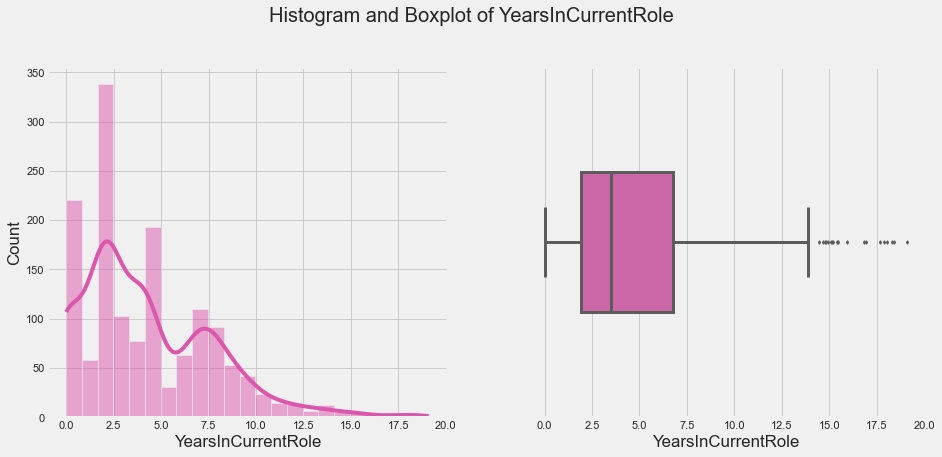

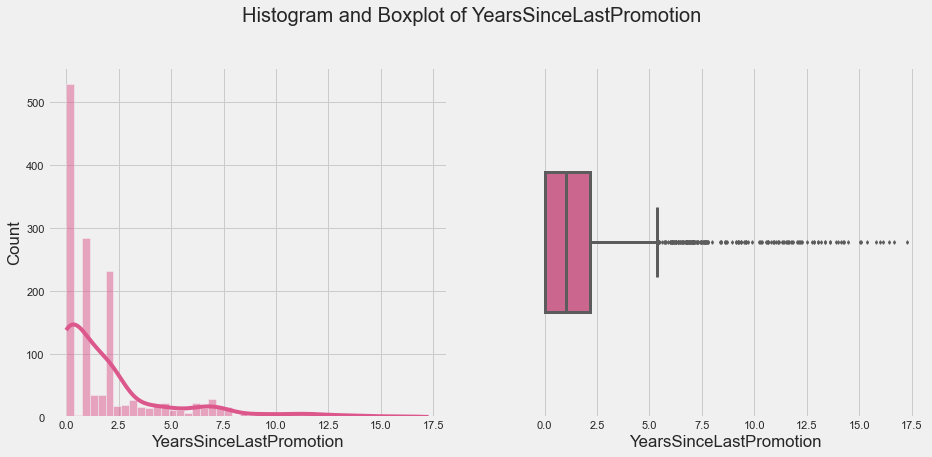

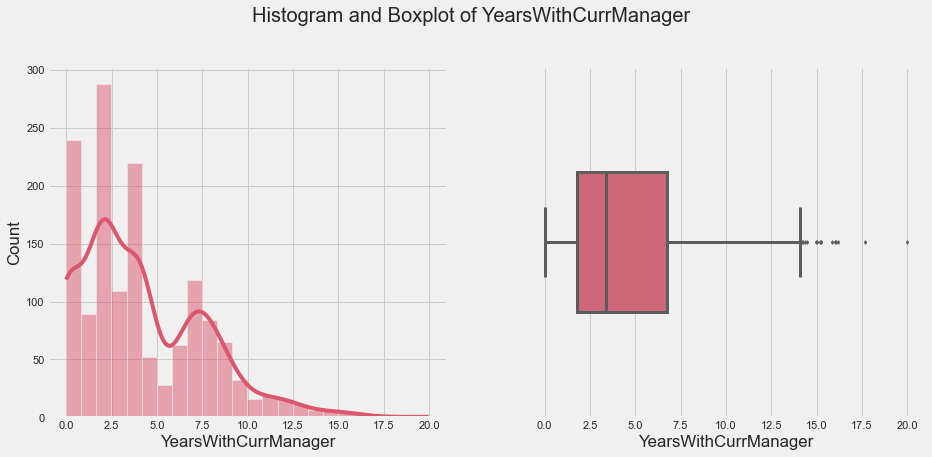

----------------------------------------------------------------------------------------------------
Countplot(s):



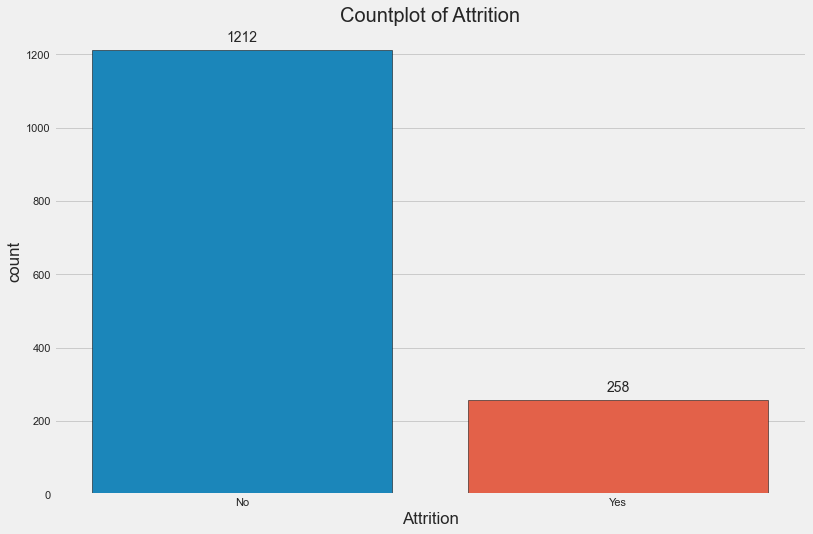

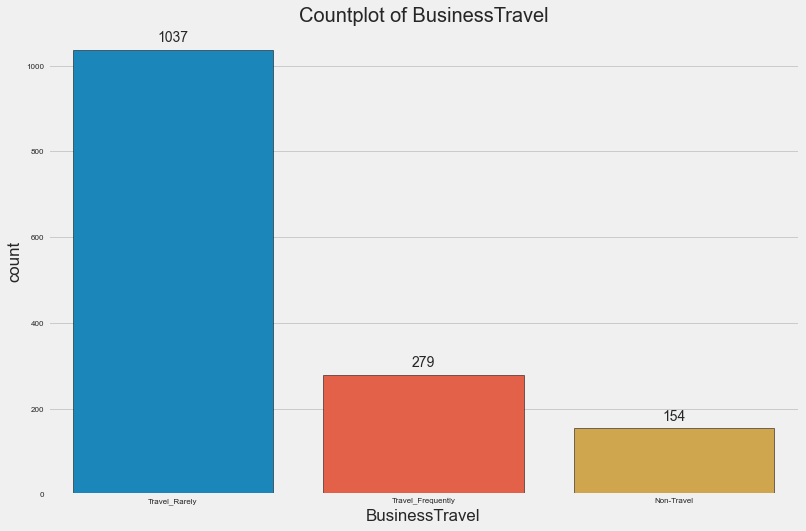

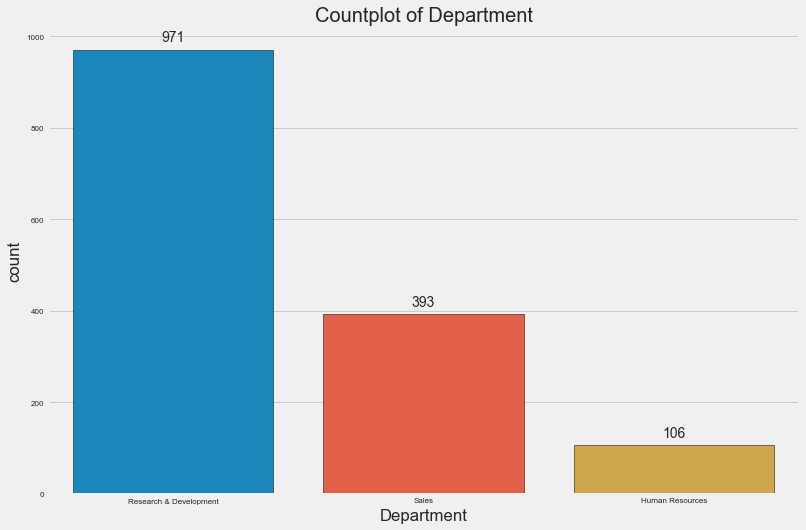

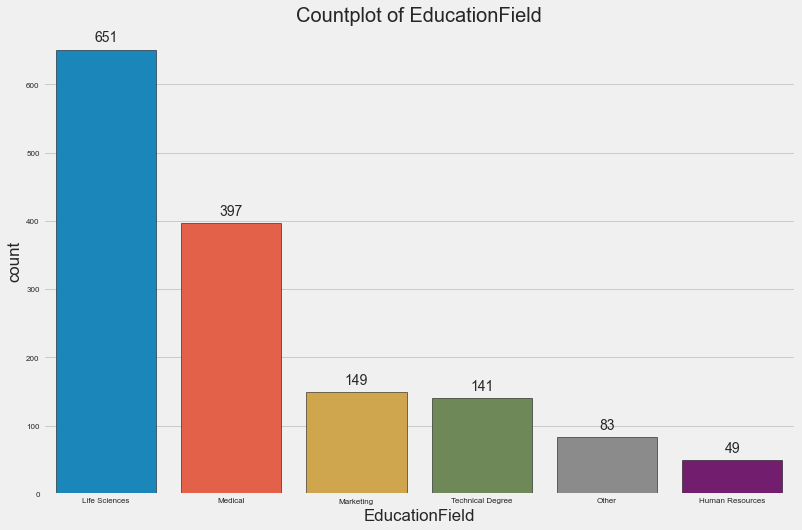

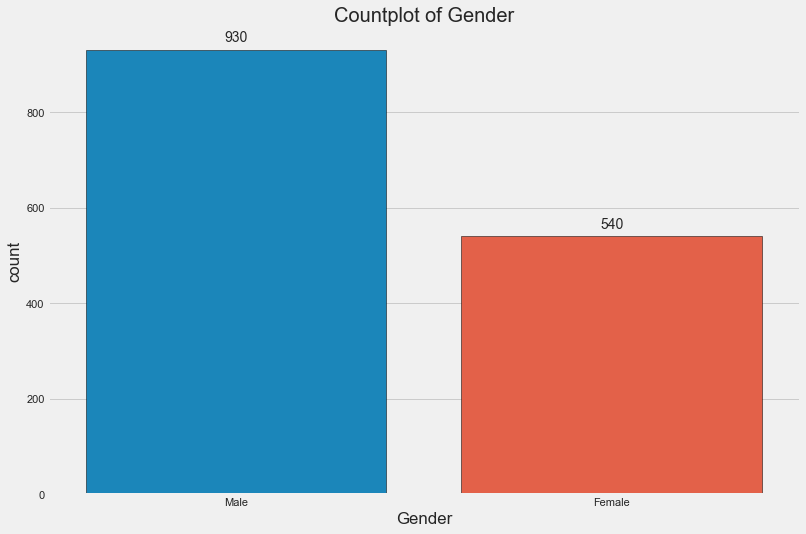

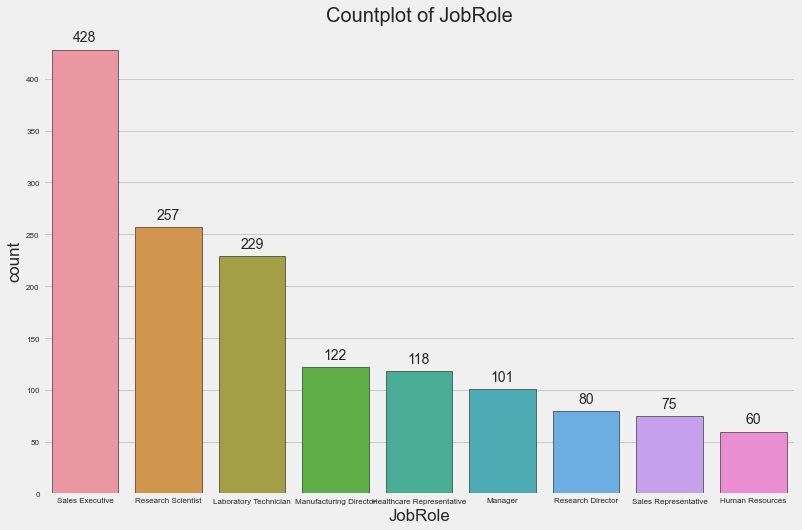

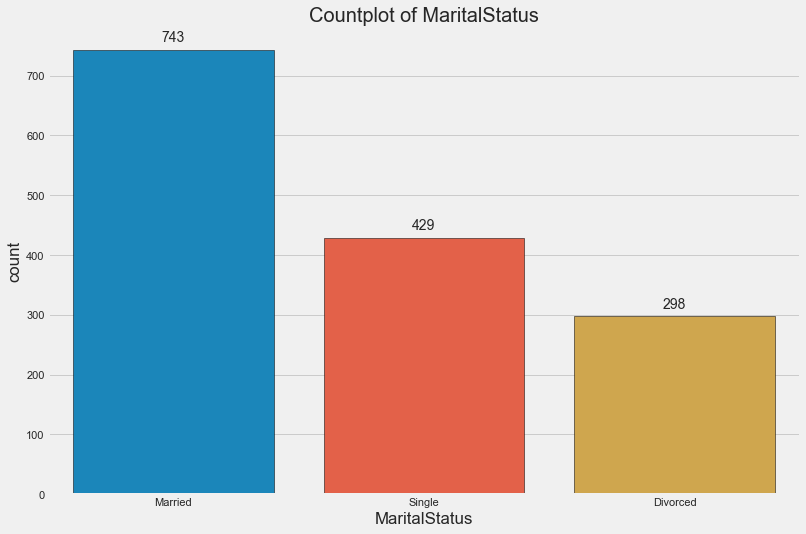

<Figure size 864x576 with 0 Axes>

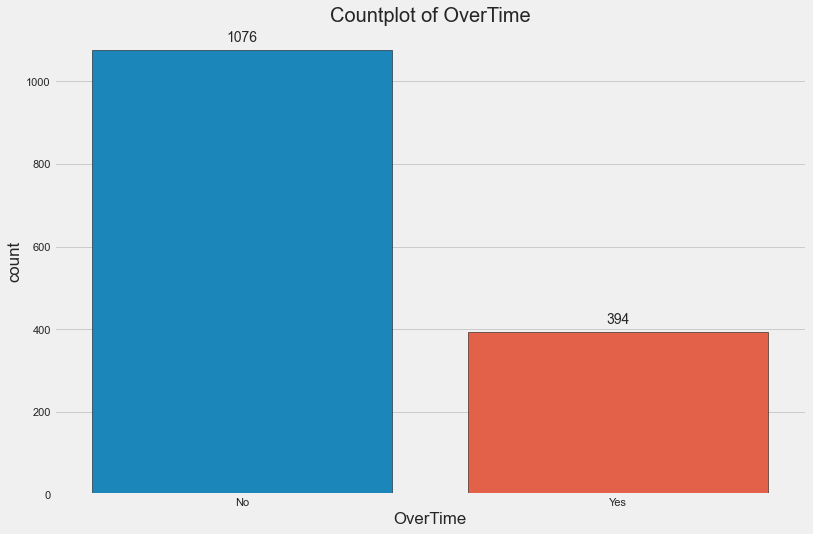

In [23]:
from fasteda import fast_eda
fast_eda(df)

here important is correlations, we are checking outliers, we need to check the relationship btw the atritions, life ballance

Notes for correlations report:  more
monthly income 
job level
total working years// 
less
years at company
years current role
years since last promo
years with current manager// 

attition is dependent on the above indepent values...

below checking correlations 

<AxesSubplot:xlabel='Age', ylabel='Density'>

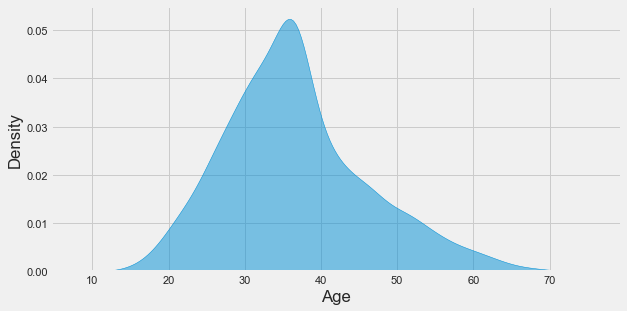

In [24]:
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.set_style('white')
sns.kdeplot(df['Age'],alpha = 0.5, shade = True)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

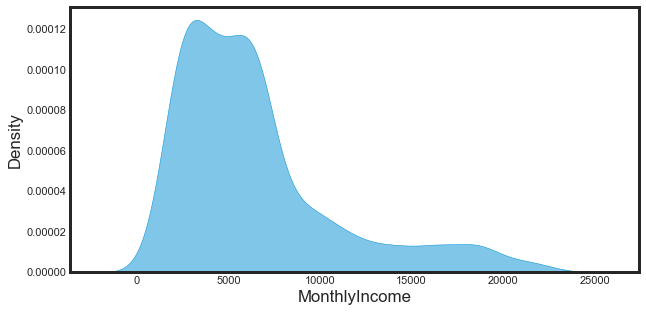

In [25]:
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.set_style('white')
sns.kdeplot(df['MonthlyIncome'],alpha = 0.5, shade = True)


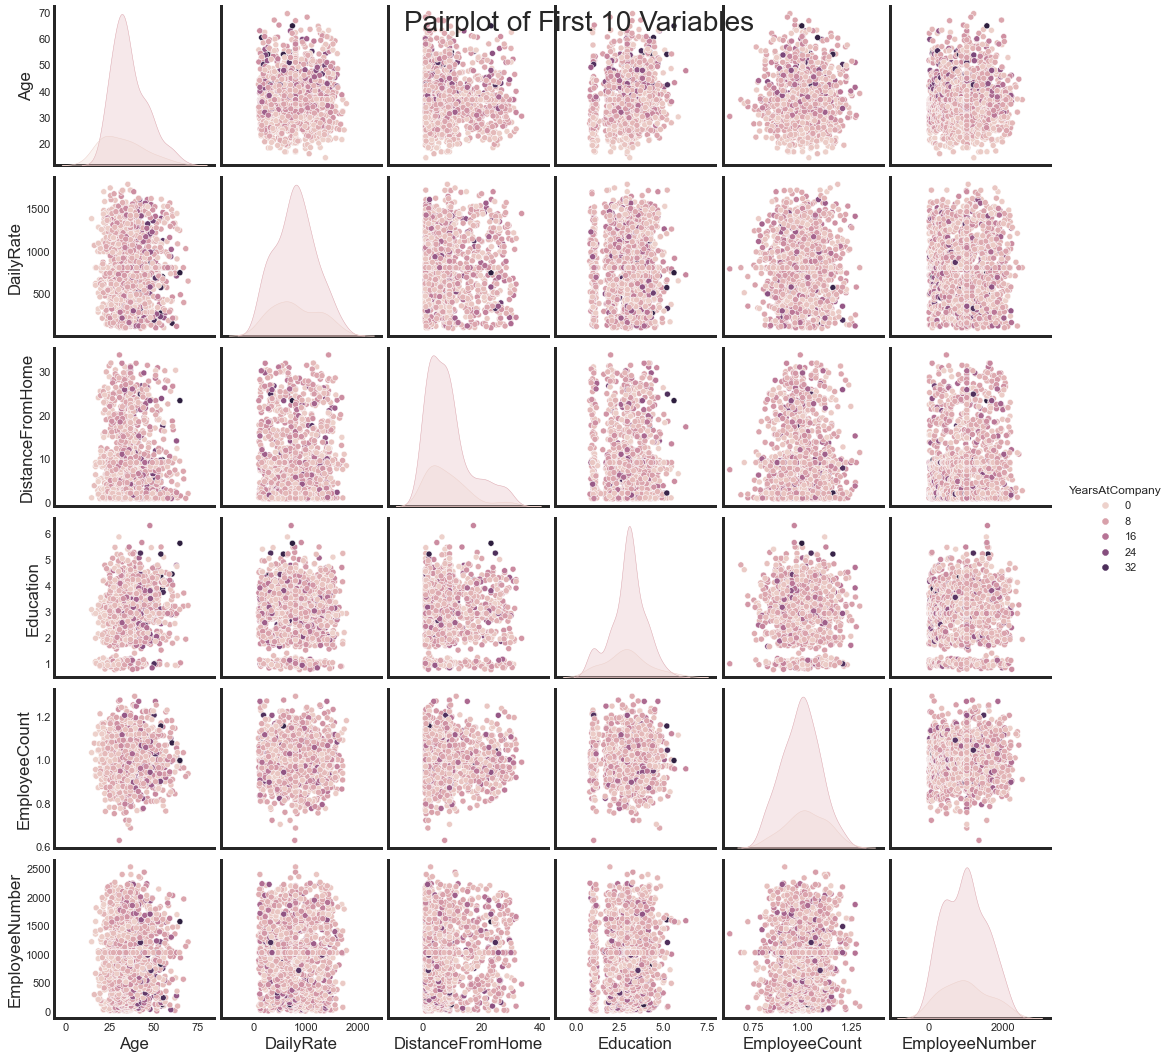

In [26]:
variables = df.iloc[:, :10]
variables["YearsAtCompany"] = df["YearsAtCompany"]
sns.pairplot(variables, hue = "YearsAtCompany")
plt.suptitle("Pairplot of First 10 Variables", fontsize = 28)
plt.show()

In [33]:
!pip install plotnine
!pip install ggplot
!pip install matplotlib.layout_engine

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib.layout_engine (from versions: none)
ERROR: No matching distribution found for matplotlib.layout_engine


In [49]:
from plotnine import ggplot, aes, geom_line

from plotnine import ggplot, aes, geom_bar, theme, element_text, ggtitle, labs
from plotnine.data import mpg  # Use your actual dataframe (df1) instead of mpg

# Assuming df is your DataFrame
df['Department'] = df['Department'].astype(str)  # Convert 'Department' to string

p = (ggplot(data=df[df['Attrition'] == 'Yes'], mapping=aes(x='Department', fill='factor(Department)')) +
    geom_bar() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    ggtitle("Distribution of terminated employees across Department") +
    labs(y="Count of employees", x="Department"))

In [50]:

df['Gender'] = df['Gender'].astype(str)  # Convert 'Department' to string

p = (ggplot(data=df[df['Attrition'] == 'Yes'], mapping=aes(x='Gender', fill='factor(Gender)')) +
    geom_bar() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +
    ggtitle("Distribution of terminated employees across Gender") +
    labs(y="Count of employees", x="Gender"))

In [55]:
from sklearn.preprocessing import LabelEncoder

In [61]:
label_encoder=LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column]=label_encoder.fit_transform(df[column].astype(str))

In [62]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,2,990.110009,2,1.016716,1.770313,1,1.033298,1.054148,2.146294,1,93.827486,3.426960,2.464492,7,3.397665,2,6438.949336,20845.103714,7.077818,0,1,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,1,276.776030,1,9.091097,1.035333,1,0.944859,2.107031,3.470803,1,52.304157,1.813458,1.788697,6,1.584059,1,4457.659622,24877.898697,1.114423,0,0,15.295717,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,2,1204.158501,1,2.198662,2.118801,4,0.810809,4.008125,3.979420,1,87.271332,1.877226,0.833488,2,3.301009,2,2124.545220,2262.942954,5.539591,0,1,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,1,1352.752432,2,2.937851,3.670674,1,0.822976,4.587269,3.734705,0,56.378982,2.932646,1.095372,6,3.220844,1,2771.699080,27189.905714,0.772793,0,1,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,2,485.053333,1,1.988953,1.120496,3,0.999325,7.228740,1.079412,1,40.433887,3.117739,0.937746,2,1.697330,1,3254.601575,17675.541599,10.118125,0,0,11.920147,3.282183,2.720431,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,0,1,914.061807,1,21.647903,2.923447,3,0.950166,2142.083554,3.171444,1,65.647722,3.372679,1.993840,2,4.169226,1,2806.950012,13077.116879,4.081321,0,0,17.915157,2.968558,3.020184,85.835352,0.962354,11.426152,3.451951,2.819336,5.436125,2.021736,0.000000,4.117695
1466,34.957777,0,2,574.675152,1,6.027683,1.122961,3,1.064563,2221.578902,4.284094,1,39.842324,2.038727,2.532482,0,2.715272,1,6544.718401,21026.154051,2.654394,0,0,14.692325,2.800889,1.014690,94.868401,0.923291,11.426152,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,0,2,151.506083,1,9.091097,3.478895,1,0.960908,1026.679166,2.152282,1,91.603642,4.394863,1.964613,4,2.152039,1,6609.842365,14364.334764,1.017623,0,1,18.744411,3.149344,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,36.635268,0,1,995.977086,0,2.094496,2.956093,3,0.873312,2086.654641,4.095580,1,59.110216,2.019760,1.925025,7,2.715272,1,5585.302599,11837.891371,1.591695,0,0,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,4.117695


<AxesSubplot:xlabel='Attrition', ylabel='Density'>

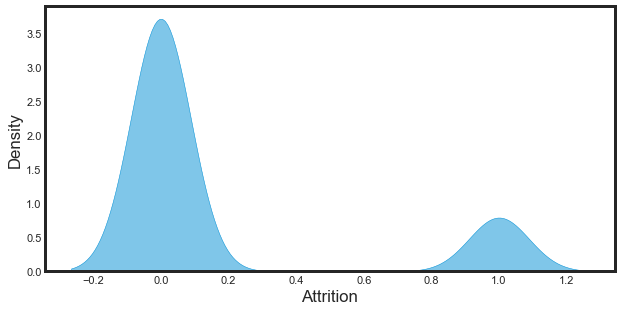